读取文件

In [1]:
# coding: UTF-8
# Preprocessor for train and test files to desired formats

import csv
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt

file_name = "ask_know_test" 

d = pd.read_csv(file_name+'.csv', usecols=['msg','type_combine'])

d['type_number'] = ''

Length = []
max_length = 0
max_i=0


将原始文件中包含content和label的两列取出并对于文本做预处理，将类别替换

In [10]:
for i in range((d.shape[0])):
    d.msg[i] = d.msg[i].strip(string.punctuation)  # 我发现有的文本后面有分号 ;，所以本行去除
    length_i = len(d.msg[i])
    Length.append(length_i)
    if length_i>max_length:
        max_length = length_i
        max_i = i
    if d.type_combine[i] == 'invalid':
        d.type_number[i] = 0
    elif d.type_combine[i] == 'yes':
        d.type_number[i] = 1
    else:
        d.type_number[i] = 2
    '''
    elif d.type_combine[i] == 'new_category'
        d.type_number[i] = 3
    '''
merge_d = d.drop(columns=['type_combine']) # 只留下两列

merge_d.to_csv(file_name+'.txt', sep='\t',header=None,index=False) # 去掉表头
#print(Length)

统计分布和频率进行可视化

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 29 30 32 33 35 36 37 40 62]
[108, 375, 480, 447, 357, 204, 153, 120, 129, 96, 51, 39, 42, 48, 21, 21, 24, 21, 9, 15, 18, 21, 3, 3, 3, 3, 12, 6, 3, 3, 6, 3, 3, 3, 3, 3]


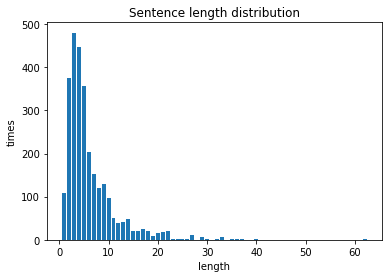

[0 1 2]
[691, 187, 74]


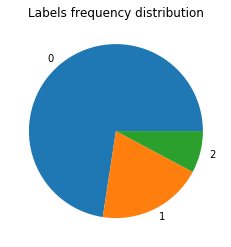

In [12]:
Length = sorted(Length)
category = list(merge_d.drop(columns=['msg']).values[:,0])


def plot_distribution(data,plot_type):

    #统计出现的元素有哪些
    unique_data = np.unique(data)
    print(unique_data)
    #统计某个元素出现的次数
    resdata = []
    for ii in unique_data:
        resdata.append(data.count(ii))
    print(resdata)

    #fig = plt.figure()
    if plot_type == 0:
        plt.bar(unique_data, resdata)
        plt.title('Sentence length distribution')
        plt.xlabel('length')
        plt.ylabel('times')
    elif plot_type == 1:
        plt.pie(resdata,labels=unique_data)
        plt.title('Labels frequency distribution')
    plt.show()
fig1 = plt.figure()
plot_distribution(Length,0)
fig2 = plt.figure()
plot_distribution(category,1)